# Exploratory Data Analysis (EDA) 
**is an approach to `analyzing` datasets to `summarize` their main characteristics, often with `visual` methods.**

Author: Siraj Shabbir  
Date: 29/09/2023  
Email: sirajshabbir321@gmail.com  

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataset
df = sns.load_dataset('titanic')

## Explore the data

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# summary stats
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# missing values
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
# number of unique values
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

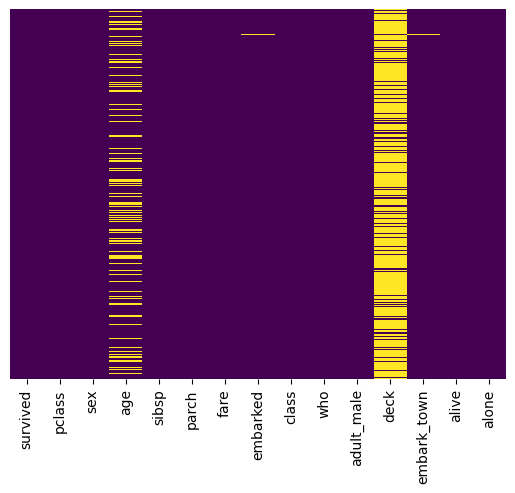

In [9]:
# visualizing missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [10]:
# droping deck
df.drop(columns="deck", inplace=True)

## Visualize the data

In [11]:
cat_cols = ["survived", "pclass", "who", "sex", "class", "embarked", "alone", "embark_town",
            "alive", "adult_male"]

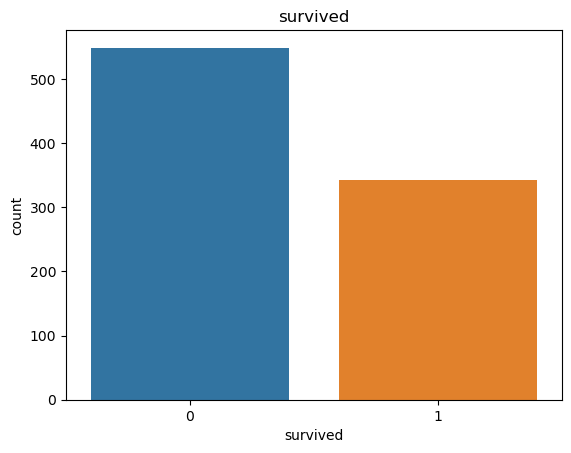

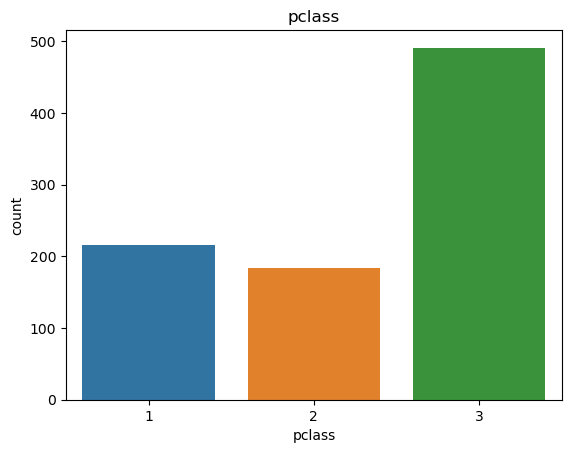

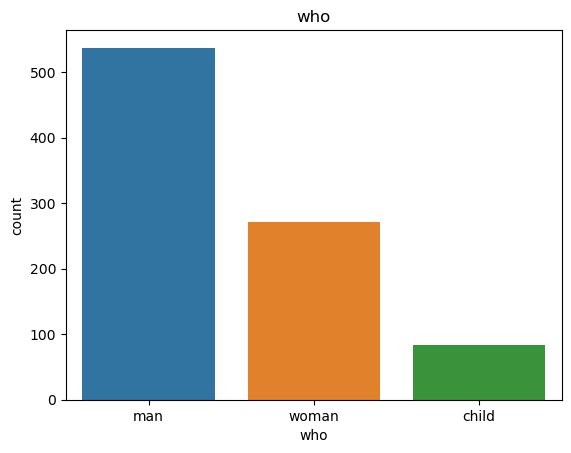

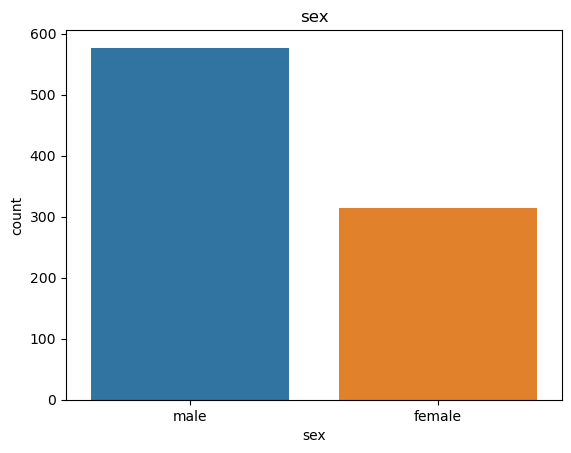

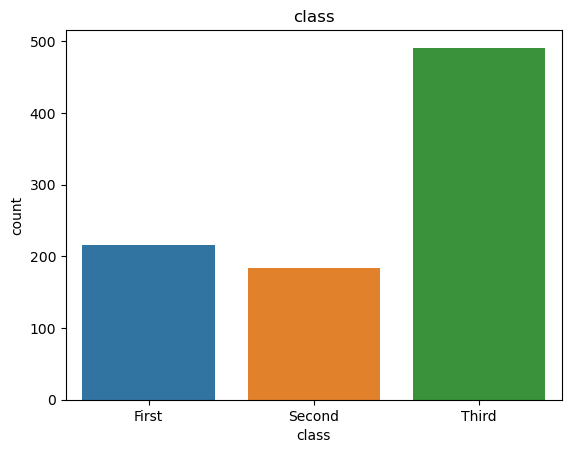

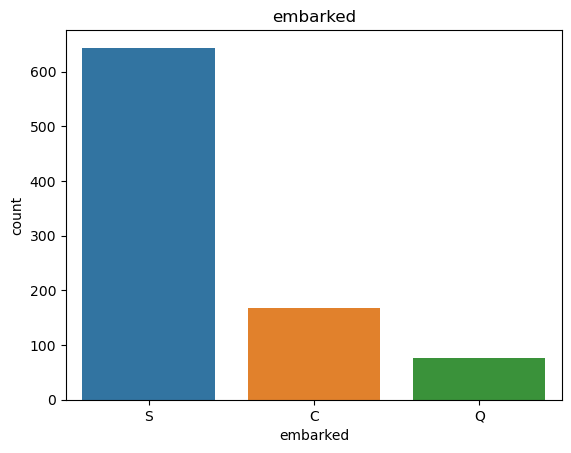

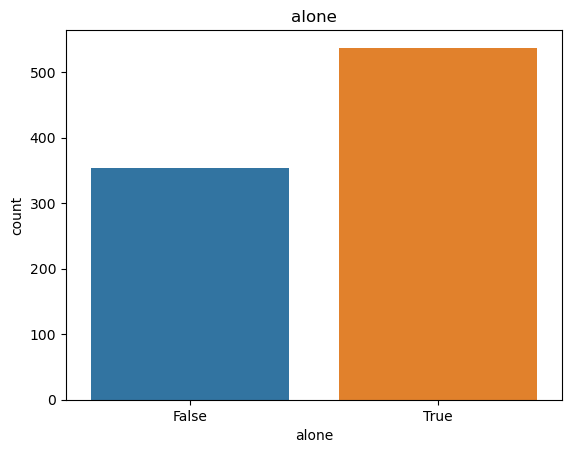

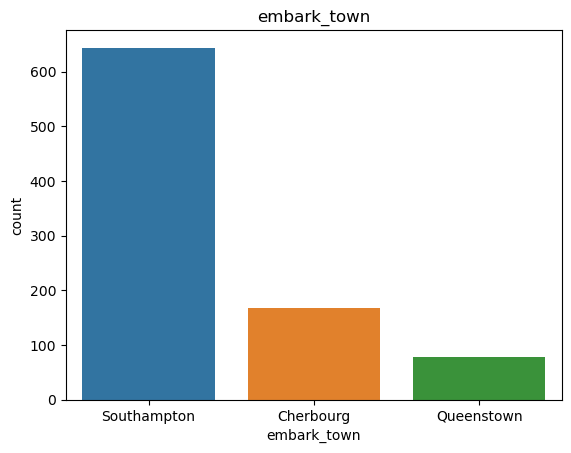

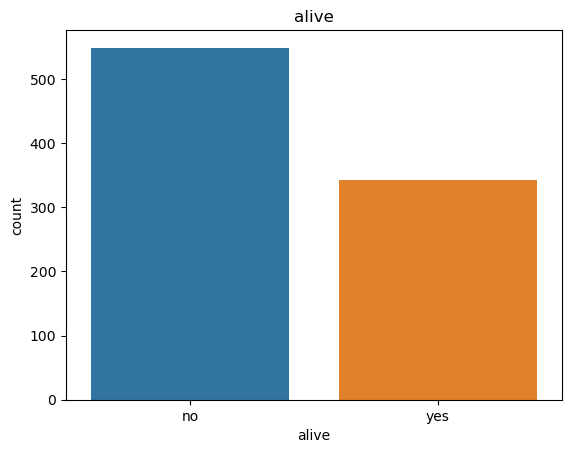

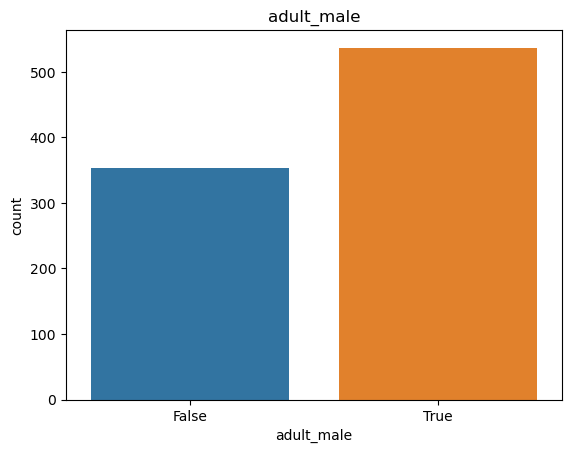

In [12]:
for col in cat_cols:
    plt.title(col)
    sns.countplot(x=col, data=df)
    plt.show()

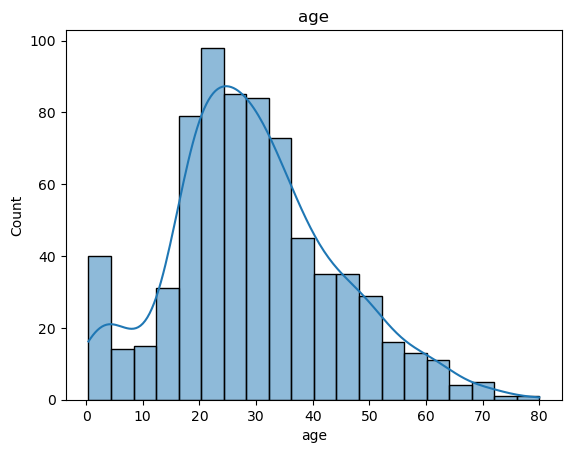

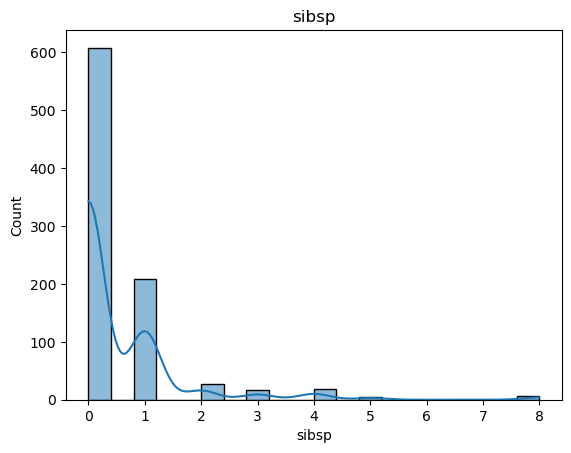

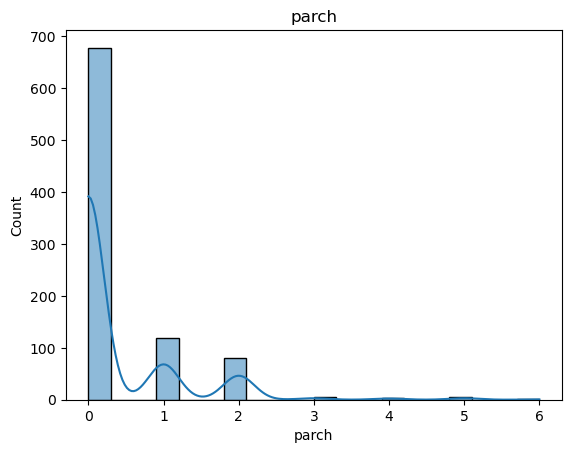

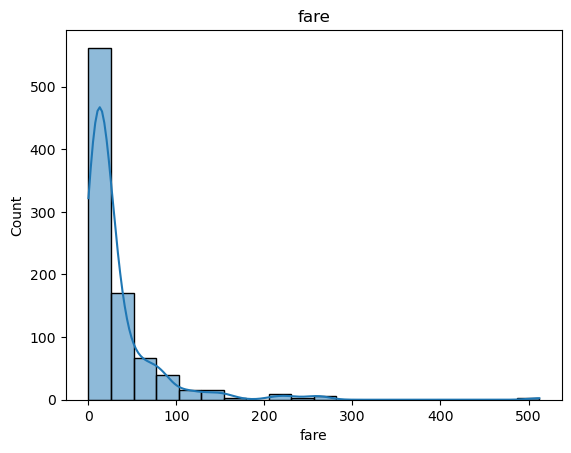

In [13]:
num_cols = ["age", "sibsp", "parch", "fare"]

for col in num_cols:
    plt.title(col)
    sns.histplot(df[col], bins=20, kde=True)
    plt.show()

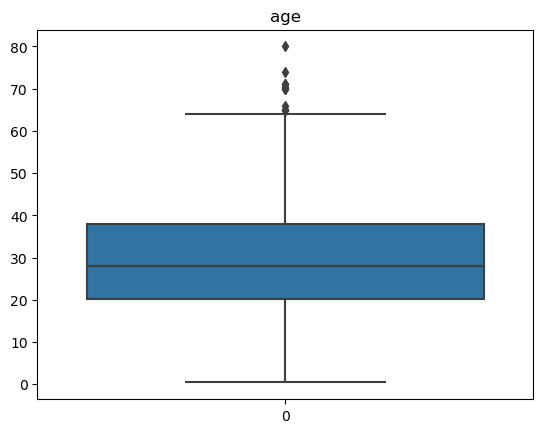

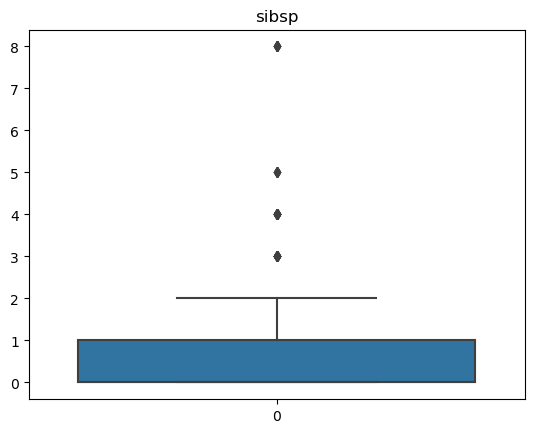

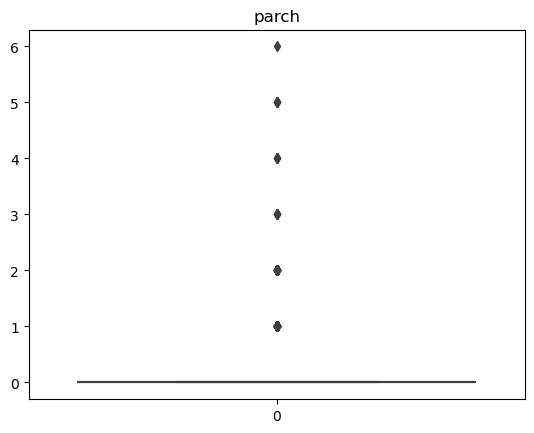

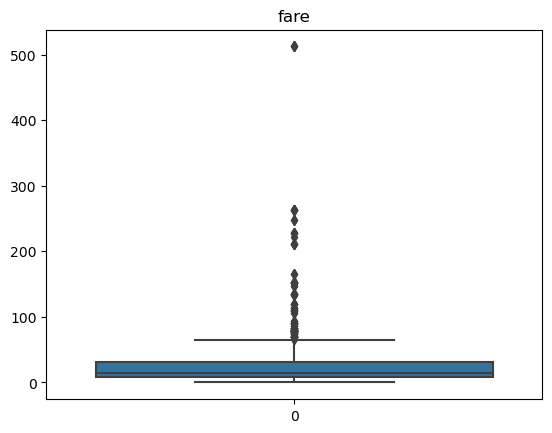

In [14]:
# checking outliers
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

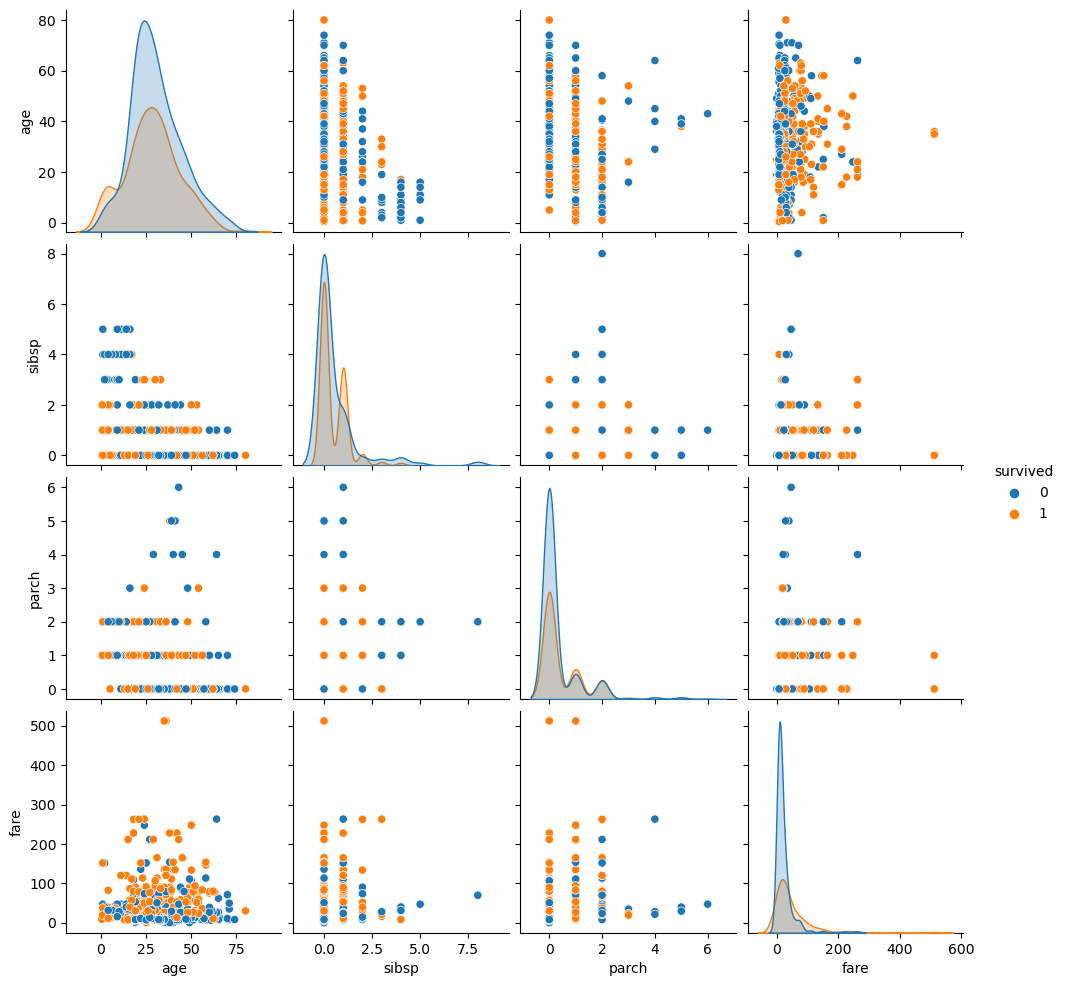

In [15]:
sns.pairplot(df[num_cols + ["survived"]], hue="survived")

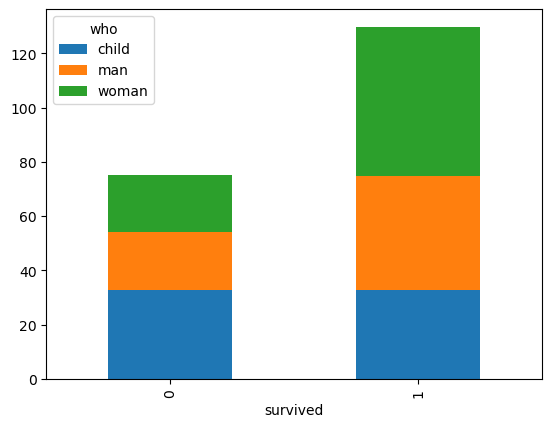

In [29]:
# stacked plot
pd.crosstab(df["survived"], df["who"], values=df["fare"], aggfunc="mean").plot(kind="bar", stacked=True);

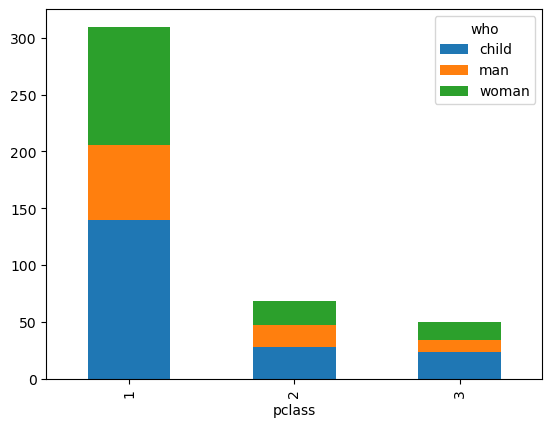

In [31]:
df.groupby(["pclass", "who"])["fare"].mean().unstack().plot(kind="bar", stacked=True);

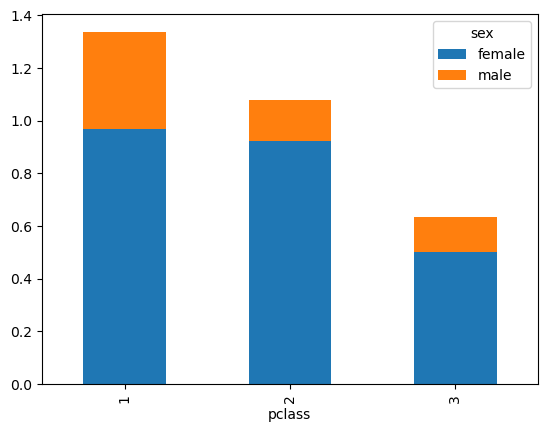

In [30]:
df.groupby(["pclass", "sex"])["survived"].mean().unstack().plot(kind="bar", stacked=True);

#### Swarn Plot  
A swarm plot is a type of scatter plot that is used for representing categorical values. It is very similar to the strip plot, but it avoids the overlapping of points.

e:\Conda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


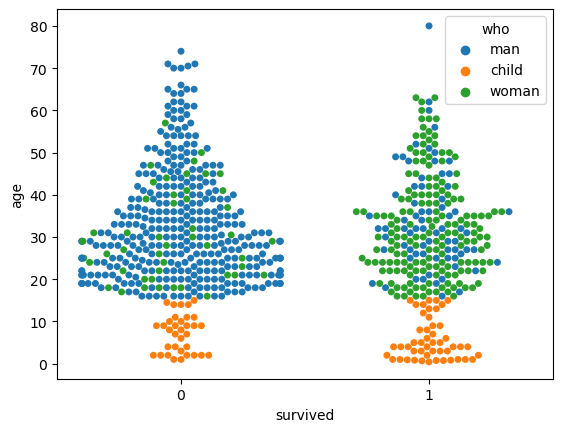

In [34]:
sns.swarmplot(x="survived", y="age", hue="who", data=df);

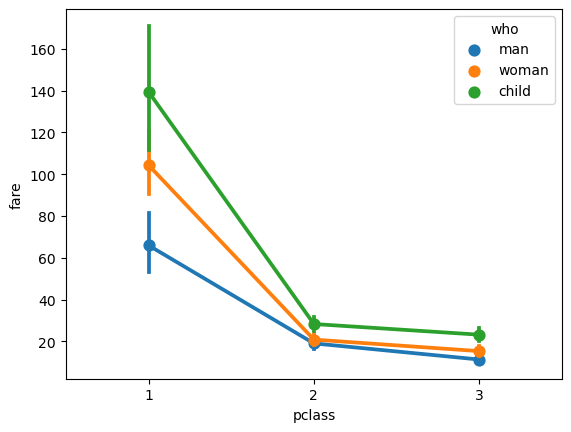

In [36]:
sns.pointplot(x="pclass", y="fare", hue="who", data=df);

(0.0, 300.0)

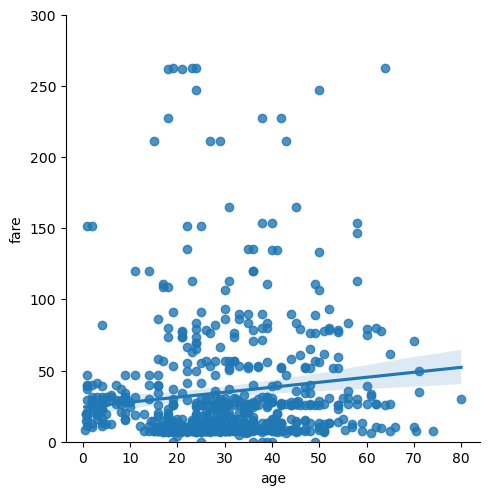

In [44]:
# relation between age and fare
df2 = df[df.fare < 300]
sns.lmplot(x="age", y="fare", data=df, );
plt.ylim(0,300)

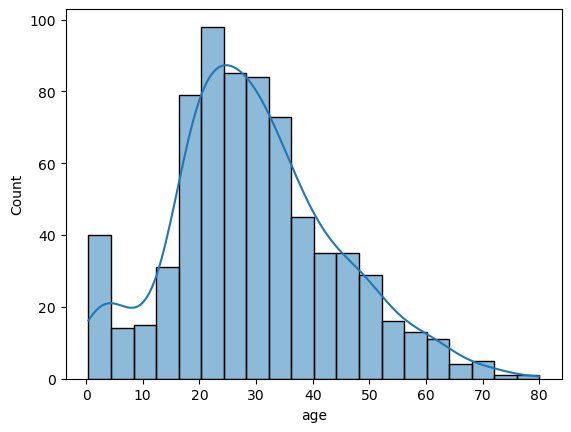

In [47]:
sns.histplot(df["age"], bins=20, kde=True);

In [51]:
# add a new column age_group
df["age_group"] = pd.cut(df["age"], bins=[0, 10, 18, 30, 50, 80], labels=["kids", "child", "young", "adult", "old"])

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,adult


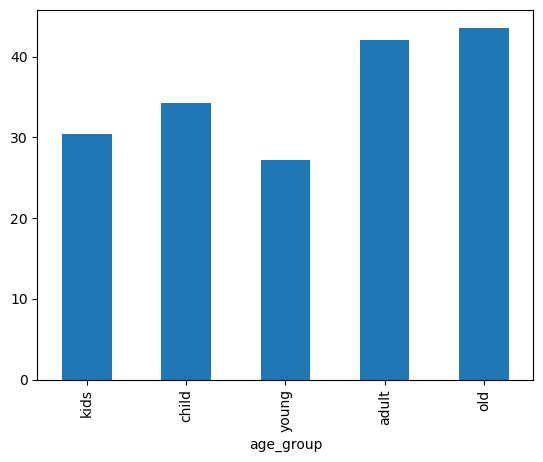

In [54]:
df.groupby("age_group")["fare"].mean().plot(kind="bar");

In [ ]:
df["family_size"] = df["sibsp"] + df["parch"] + 1